In [7]:
import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

import joblib

In [3]:
df_train = pd.read_csv(r"C:\Users\ammym\OneDrive\Desktop\CDC\train_preprocessed.csv")
df_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,above_ground_ratio,bath_per_bed,living_to_lot_ratio,relative_living_size,relative_lot_size,neighborhood_density,distance_from_center,waterfront_view,house_age,is_renovated,years_since_reno,year_sale,month_sale,quarter_sale
0,1000102,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,12.542548,0.999584,0.428571,0.256027,1.164483,1.280989,3.549733,0.234493,0,24,0,0,2014,9,3
1,1001200050,4,1.50,1260,7248,1.5,0,0,5,7,1260,0,1955,0,98188,47.4330,-122.292,1300,7732,12.464587,0.999207,0.300000,0.173817,0.968486,0.937282,5.943121,0.149684,0,60,0,0,2014,9,3
2,1003000175,3,1.00,980,7606,1.0,0,0,3,7,980,0,1954,0,98188,47.4356,-122.290,980,8125,12.305923,0.998981,0.250000,0.128829,0.998981,0.936008,8.282365,0.146422,0,61,0,0,2014,12,4
3,100300280,3,2.25,1430,4777,2.0,0,0,3,7,1430,0,2010,0,98059,47.4867,-122.152,1639,3854,12.779876,0.999301,0.562500,0.299288,0.871951,1.239170,2.350000,0.096469,0,5,0,0,2014,10,4
4,100300530,3,2.50,1520,3003,2.0,0,0,3,7,1520,0,2009,0,98059,47.4876,-122.153,1820,3030,12.706851,0.999343,0.625000,0.505992,0.834706,0.990762,1.663921,0.095138,0,6,0,0,2014,9,3


In [4]:
df_train.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price', 'above_ground_ratio',
       'bath_per_bed', 'living_to_lot_ratio', 'relative_living_size',
       'relative_lot_size', 'neighborhood_density', 'distance_from_center',
       'waterfront_view', 'house_age', 'is_renovated', 'years_since_reno',
       'year_sale', 'month_sale', 'quarter_sale'],
      dtype='object')

In [5]:
x = df_train.drop(columns = ["id", "log_price"])
y = df_train["log_price"]

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

In [10]:
params = {
    "n_estimators" : randint(300,800),
    "max_depth" : randint(3,10),
    "learning_rate": uniform(0.01, 0.1),
    "subsample" : uniform(0.6, 0.4),
    "min_child_weight" : randint(1,10),
    "gamma" : uniform(0,0.3)
}

xgb_model = XGBRegressor(
    objective = "reg:squarederror",
    n_jobs = -1,
    random_state = 42
)

random_search =  RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = params,
    n_iter = 40, 
    scoring = "r2",
    cv = 3,
    verbose = 1,
    random_state = 42,
    n_jobs = -1
)

In [12]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'gamma': <scipy.stats....0021918365E10>, 'learning_rate': <scipy.stats....002191835D130>, 'max_depth': <scipy.stats....0021918685E00>, 'min_child_weight': <scipy.stats....0021918686060>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",40
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the

In [13]:
best_xgb = random_search.best_estimator_

print(f"Best Parameters : {random_search.best_params_}")

Best Parameters : {'gamma': np.float64(0.012130076861529403), 'learning_rate': np.float64(0.08106628896857873), 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 362, 'subsample': np.float64(0.9583054382694077)}


In [14]:
y_pred_log = best_xgb.predict(x_val)

y_pred_real = np.expm1(y_pred_log)
y_true = np.expm1(y_val)

rmse = np.sqrt(mean_squared_error(y_true, y_pred_real))
r2 = r2_score(y_true, y_pred_real)

print("RMSE :", rmse)
print("R squared score :", r2)

RMSE : 108087.43922798561
R squared score : 0.9009625096373303


In [17]:
print("Percentage Error :", (rmse/np.mean(np.expm1x(df_train["log_price"])))*100, "%")

Percentage Error : 20.071245429748576 %


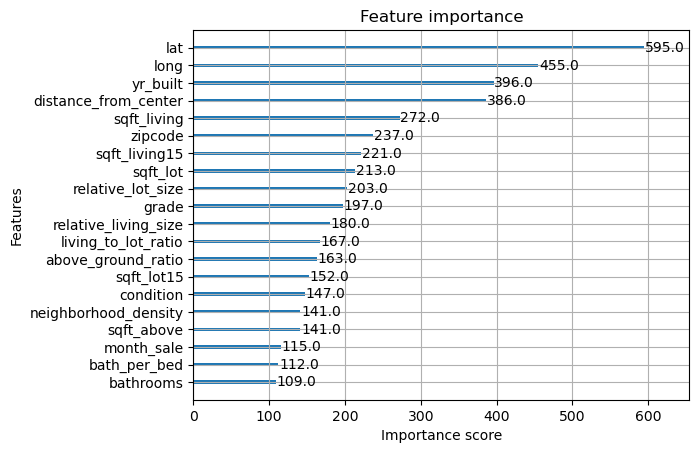

In [18]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb, max_num_features = 20)
plt.show()

In [19]:
from joblib import dump
dump(best_xgb, r"C:\Users\ammym\OneDrive\Desktop\CDC\saved_models\XGB_Train_Tabular.joblib")

['C:\\Users\\ammym\\OneDrive\\Desktop\\CDC\\saved_models\\XGB_Train_Tabular.joblib']

In [20]:
df_test = pd.read_csv(r"C:\Users\ammym\OneDrive\Desktop\CDC\test_preprocessed.csv")
df_test.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,above_ground_ratio,bath_per_bed,living_to_lot_ratio,relative_living_size,relative_lot_size,neighborhood_density,distance_from_center,waterfront_view,house_age,is_renovated,years_since_reno,year_sale,month_sale,quarter_sale
0,1000102,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,0.999584,0.428571,0.256027,1.164483,1.280989,3.549733,0.231953,0,24,0,0,2015,4,2
1,100100050,3,1.00,1320,11090,1.0,0,0,3,7,1320,0,1955,0,98155,47.7748,-122.304,1320,8319,0.999243,0.250000,0.119015,0.999243,1.332933,6.297502,0.234762,0,60,0,0,2014,11,4
2,1001200035,3,1.00,1350,7973,1.5,0,0,3,7,1350,0,1954,0,98188,47.4323,-122.292,1310,7491,0.999260,0.250000,0.169300,1.029748,1.064202,5.713959,0.148290,0,61,0,0,2015,3,1
3,100300500,3,2.50,1520,3041,2.0,0,0,3,7,1520,0,2009,0,98059,47.4874,-122.152,1820,3229,0.999343,0.625000,0.499671,0.834706,0.941486,1.773202,0.093793,0,6,0,0,2014,11,4
4,1005000036,3,1.75,1840,8601,1.0,0,0,3,7,920,920,1905,2014,98118,47.5359,-122.276,1390,7452,0.499728,0.437500,0.213904,1.322789,1.154032,5.357297,0.066275,0,110,1,1,2014,6,2


In [25]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'above_ground_ratio', 'bath_per_bed',
       'living_to_lot_ratio', 'relative_living_size', 'relative_lot_size',
       'neighborhood_density', 'distance_from_center', 'waterfront_view',
       'house_age', 'is_renovated', 'years_since_reno', 'year_sale',
       'month_sale', 'quarter_sale'],
      dtype='object')

In [26]:
FEATURE_COLS = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'above_ground_ratio', 'bath_per_bed',
       'living_to_lot_ratio', 'relative_living_size', 'relative_lot_size',
       'neighborhood_density', 'distance_from_center', 'waterfront_view',
       'house_age', 'is_renovated', 'years_since_reno', 'year_sale',
       'month_sale', 'quarter_sale']

In [27]:
x_test = df_test[FEATURE_COLS]

y_pred_test_log = best_xgb.predict(x_test)
y_pred_test_real = np.expm1x(y_pred_test_log)


In [28]:
xgb_pred = pd.DataFrame({
    "id" : df_test["id"],
    "price" : y_pred_test_real
})

In [29]:
assert len(xgb_pred) == len(df_test)
assert xgb_pred["price"].min() > 0

In [30]:
xgb_pred.to_csv(r"C:\Users\ammym\OneDrive\Desktop\CDC\predictions\XGB_predictions.csv", index = False)